13_neda_mimfpt_(ML_DTC)

Engin Abdan

### Libraries

In [69]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import skew

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, roc_curve

from sklearn.tree import plot_tree

from sklearn.tree import DecisionTreeClassifier

from yellowbrick.classifier import ClassPredictionError

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.style.use('classic')
#sns.set_style("white")

### Data

In [70]:
stu = pd.read_excel("std_ins_ml_data.xlsx")

In [71]:
stu.head(1)

,Unnamed: 0,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int,Plt_Or_Not,Flight_Mean,MI_Cat
0,0,20,19,10,16,13,16,17,22,1,95,Intrap


In [72]:
drop_list = ["Unnamed: 0", "Flight_Mean","MI_Cat"]
stu.drop(drop_list, inplace=True, axis=1)
stu.head(1)

,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int,Plt_Or_Not
0,20,19,10,16,13,16,17,22,1


### Data infos

In [73]:
stu.describe().T

,count,mean,std,min,25%,50%,75%,max
Ling_Int,100.0,17.72,3.068511,11.0,16.00,17.0,20.0,26.0
Math_Int,100.0,17.75,3.655285,10.0,15.00,17.0,19.0,33.0
Spa_Int,100.0,17.81,3.047420,10.0,15.75,17.5,20.0,26.0
Mus_Int,100.0,17.86,3.110815,10.0,16.00,17.5,20.0,26.0
Nat_Int,100.0,18.16,3.740901,10.0,15.75,18.0,20.0,33.0
Body_Int,100.0,17.20,2.670452,10.0,15.00,17.0,19.0,23.0
Interp_Int,100.0,17.78,2.865962,12.0,16.00,18.0,19.0,26.0
Intrap_Int,100.0,18.07,2.875374,13.0,16.00,18.0,20.0,26.0
Plt_Or_Not,100.0,0.58,0.496045,0.0,0.00,1.0,1.0,1.0


### Data Balance

In [74]:
stu["Plt_Or_Not"].value_counts()

1    58
0    42
Name: Plt_Or_Not, dtype: int64

### Skewness

In [75]:
x = stu.drop(columns=["Plt_Or_Not"]).columns
for i in x:
    if skew(stu[i]) >= -0.5 and skew(stu[i]) < 0.5:
        print(f"{i} \t: {skew(stu[i])} \t>>> Normal")
    elif skew(stu[i]) >= 0.5 and skew(stu[i]) < 1.0:
        print(f"{i} \t: {skew(stu[i])} \t>>> Moderate")
    elif skew(stu[i]) >= 1.0:
        print(f"{i} \t: {skew(stu[i])} \t>>> Skewed")              

Ling_Int 	: 0.12059345356069898 	>>> Normal
Math_Int 	: 1.3051123209475743 	>>> Skewed
Spa_Int 	: 0.2115483275849964 	>>> Normal
Mus_Int 	: 0.32126133203604673 	>>> Normal
Nat_Int 	: 0.8025455431140828 	>>> Moderate
Body_Int 	: 0.16184329645515394 	>>> Normal
Interp_Int 	: 0.22759596608919014 	>>> Normal
Intrap_Int 	: 0.12173869243645632 	>>> Normal


### Heatmap

In [76]:
# plt.figure(figsize=(20,10))
# sns.heatmap(stu.corr(), annot=True, cmap="BrBG")
# plt.tight_layout();

### Pairplot

In [77]:
#sns.pairplot(stu,hue="Plt_Or_Not");

### Corr With Plt_Or_Not

<AxesSubplot:>

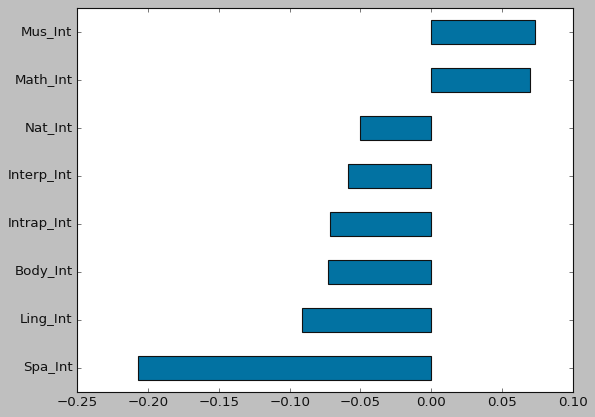

In [78]:
stu.corr()["Plt_Or_Not"].drop("Plt_Or_Not").sort_values().plot.barh()

### Train Test Split

In [79]:
from sklearn.model_selection import train_test_split

x = stu.drop(columns=["Plt_Or_Not"], axis=1)
y = stu["Plt_Or_Not"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
print("Train features shape : ", x_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", x_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (70, 8)
Train target shape   :  (70,)
Test features shape  :  (30, 8)
Test target shape    :  (30,)


### DTC & Model

In [80]:
model = DecisionTreeClassifier()

model.fit(x_train, y_train)
y_test_pred = model.predict(x_test)

print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

[[ 7  9]
 [ 4 10]]
              precision    recall  f1-score   support

           0       0.64      0.44      0.52        16
           1       0.53      0.71      0.61        14

    accuracy                           0.57        30
   macro avg       0.58      0.58      0.56        30
weighted avg       0.59      0.57      0.56        30



### DTC & CV

In [81]:
model = DecisionTreeClassifier(max_depth=None)

scores = cross_validate(model,
                        x_train,
                        y_train,
                        scoring = ["precision_macro",
                                   "recall_macro",
                                   "f1_macro",
                                   "accuracy"],
                        cv = 10)
                        
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision_macro    0.614048
test_recall_macro       0.616667
test_f1_macro           0.577976
test_accuracy           0.628571
dtype: float64

### DTC & GridSearchCV

In [82]:
from sklearn.model_selection import GridSearchCV
model = DecisionTreeClassifier()

In [83]:
param_grid = {"criterion" :["gini", "entropy", "log_loss"],
              "splitter":["best", "random"],
              "max_features":[None, "auto", "log2", 2, 3, 4, 5, 6, 7],
              "max_depth": [None, 2, 3, 4, 5],
              "min_samples_leaf": [1, 2, 3, 4, 5, 6, 7],
              "min_samples_split": [2, 3, 5, 6, 7, 8, 9]}

In [84]:
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='accuracy',
                          cv=10,
                          n_jobs = -1)

In [85]:
grid_model.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 2, 3, 4, 5],
                         'max_features': [None, 'auto', 'log2', 2, 3, 4, 5, 6,
                                          7],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 3, 5, 6, 7, 8, 9],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [86]:
grid_model.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [87]:
y_test_pred = grid_model.predict(x_test)
y_train_pred = grid_model.predict(x_train)

In [88]:
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

[[25  1]
 [10 34]]
              precision    recall  f1-score   support

           0       0.71      0.96      0.82        26
           1       0.97      0.77      0.86        44

    accuracy                           0.84        70
   macro avg       0.84      0.87      0.84        70
weighted avg       0.88      0.84      0.85        70



In [89]:
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

[[8 8]
 [7 7]]
              precision    recall  f1-score   support

           0       0.53      0.50      0.52        16
           1       0.47      0.50      0.48        14

    accuracy                           0.50        30
   macro avg       0.50      0.50      0.50        30
weighted avg       0.50      0.50      0.50        30



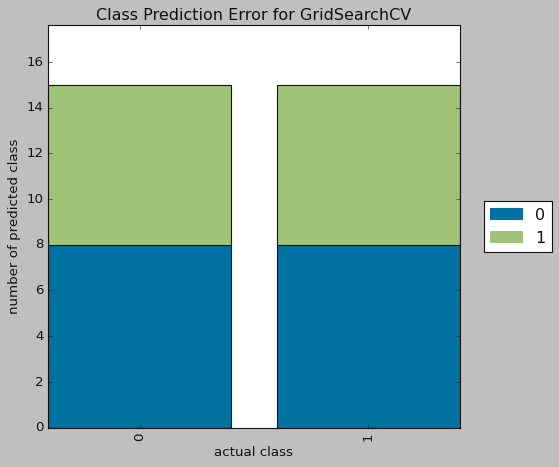

In [90]:
from yellowbrick.classifier import ClassPredictionError
visualizer = ClassPredictionError(grid_model)

visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.poof();

### Feature Importances

In [91]:
model = DecisionTreeClassifier(criterion="gini",
                               max_depth=4,
                               max_features=4,
                               min_samples_leaf=1,
                               min_samples_split=9,
                               splitter="best")

model.fit(x_train, y_train)
Feat_Imp = pd.DataFrame(index=x.columns,
                        data = model.feature_importances_, 
                        columns = ["Feat_Imp"]).sort_values("Feat_Imp")
Feat_Imp

,Feat_Imp
Spa_Int,0.000000
Mus_Int,0.000000
Nat_Int,0.000000
Interp_Int,0.000000
Ling_Int,0.190979
Intrap_Int,0.198677
Math_Int,0.281122
Body_Int,0.329221


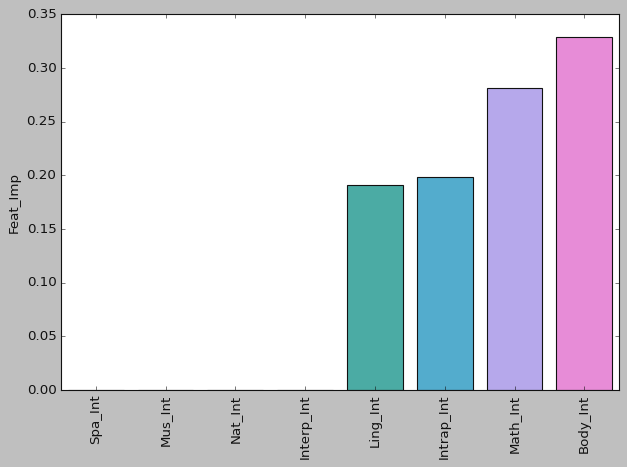

In [92]:
sns.barplot(x = Feat_Imp.index, y = 'Feat_Imp', data = Feat_Imp)
plt.xticks(rotation = 90)
plt.tight_layout()

### Visualize Tree

In [93]:
model = DecisionTreeClassifier(criterion="gini",
                               max_depth=4,
                               max_features=4,
                               min_samples_leaf=1,
                               min_samples_split=9,
                               splitter="best")
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, max_features=4, min_samples_split=9)

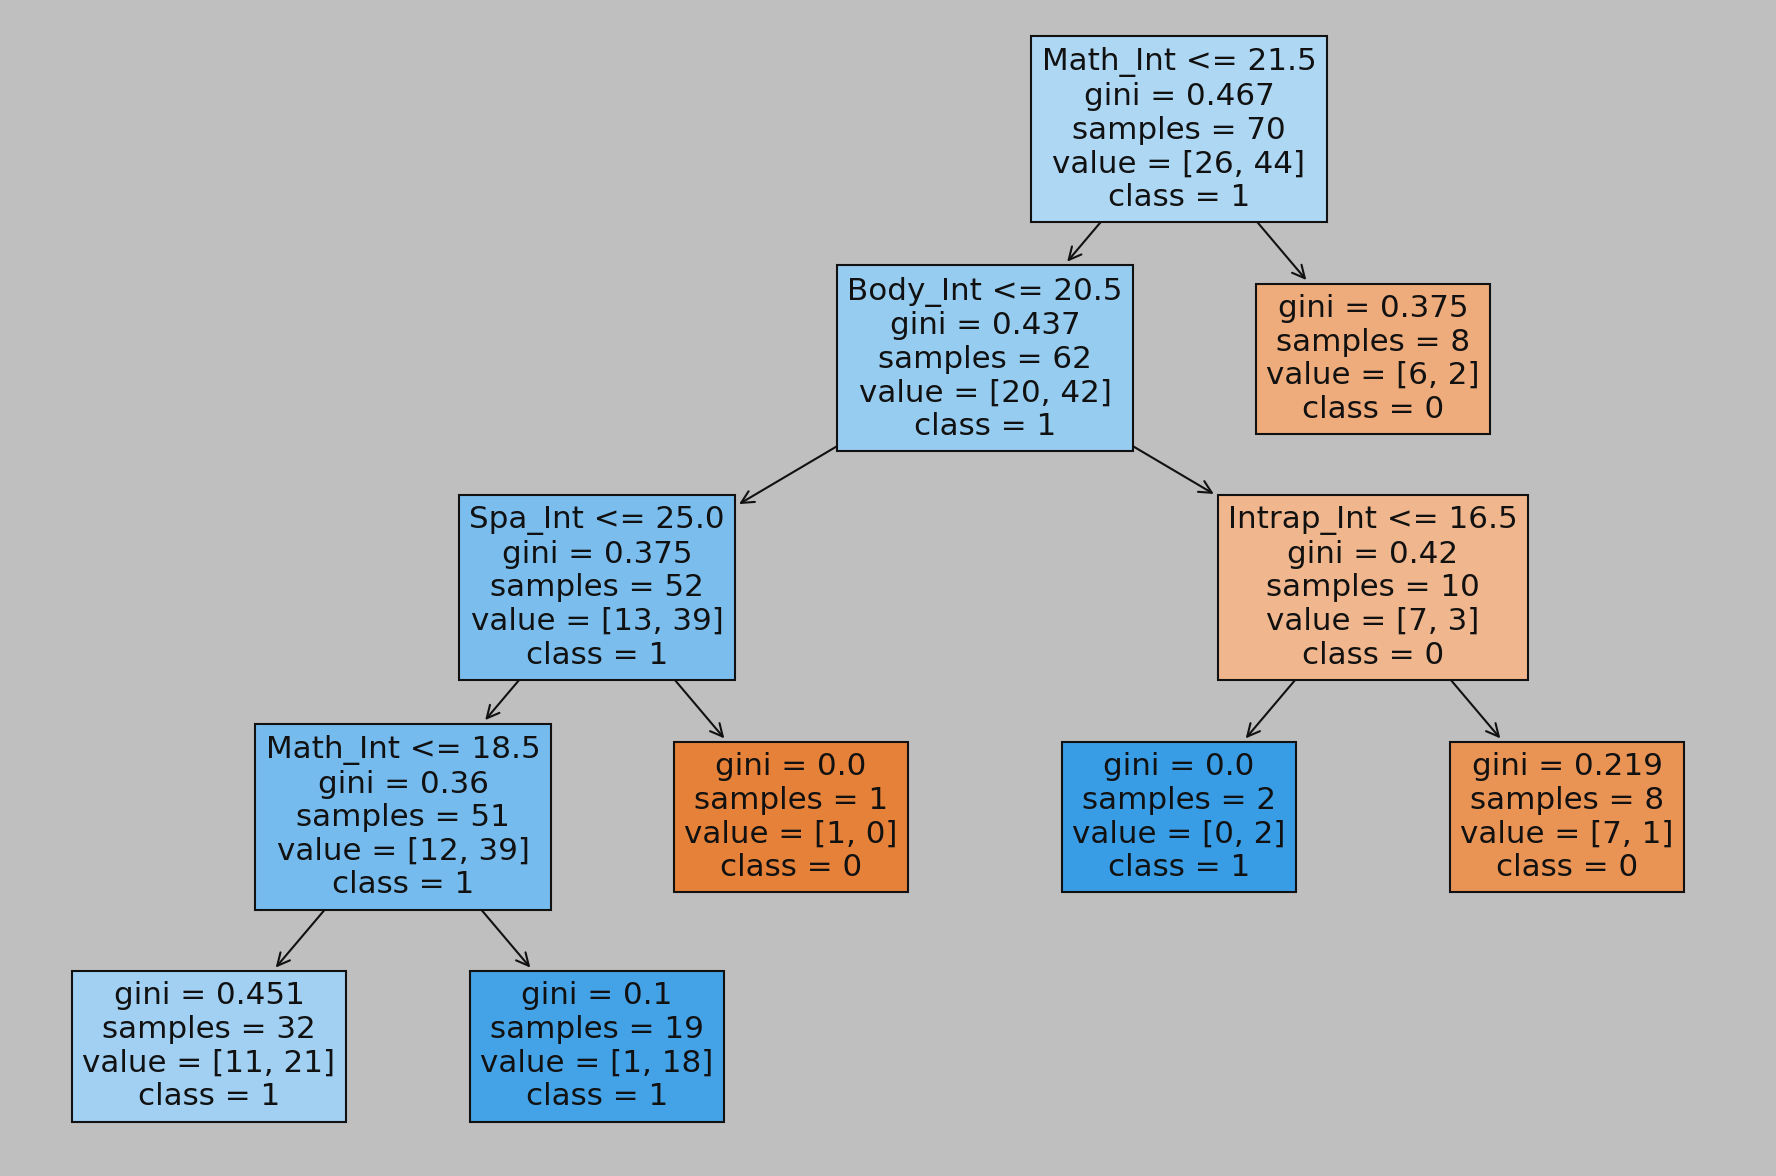

In [94]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8),dpi=150)
plot_tree(model,
          filled=True,
          feature_names=x.columns,
          class_names = ["0", "1"])
plt.tight_layout();

### Best Threshold

In [95]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, precision_recall_curve, average_precision_score

In [96]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion="gini",
                               max_depth=4,
                               max_features=4,
                               min_samples_leaf=1,
                               min_samples_split=9,
                               splitter="best")
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, max_features=4, min_samples_split=9)

In [97]:
y_test_pred = model.predict(x_test)
y_test_pred_proba = model.predict_proba(x_test)

In [98]:
test_data = pd.concat([x_test, y_test], axis=1)
test_data["pred1"] = y_test_pred
test_data["pred_proba"] = y_test_pred_proba[:,1]
test_data.head(5)

,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int,Plt_Or_Not,pred1,pred_proba
83,22,19,13,18,21,18,15,19,1,1,1.000000
53,17,13,18,13,13,22,23,20,1,1,0.666667
70,21,16,16,16,19,18,18,20,1,1,0.700000
45,14,14,15,26,20,13,20,14,1,1,0.700000
44,16,17,16,17,21,19,18,20,0,1,0.700000


In [99]:
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

[[ 3 13]
 [ 3 11]]
              precision    recall  f1-score   support

           0       0.50      0.19      0.27        16
           1       0.46      0.79      0.58        14

    accuracy                           0.47        30
   macro avg       0.48      0.49      0.43        30
weighted avg       0.48      0.47      0.42        30



In [100]:
y_train_pred_proba = model.predict_proba(x_train)
roc_auc_score(y_train, y_train_pred_proba[:,1])

fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_pred_proba[:,1])

optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
optimal_threshold_rac

0.6666666666666666

In [101]:
test_data["pred2"] = test_data["pred_proba"].apply(lambda x : 1 if x >= optimal_threshold_rac else 0)
test_data.head(5)

,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int,Plt_Or_Not,pred1,pred_proba,pred2
83,22,19,13,18,21,18,15,19,1,1,1.000000,1
53,17,13,18,13,13,22,23,20,1,1,0.666667,1
70,21,16,16,16,19,18,18,20,1,1,0.700000,1
45,14,14,15,26,20,13,20,14,1,1,0.700000,1
44,16,17,16,17,21,19,18,20,0,1,0.700000,1


In [102]:
y_pred2 = test_data["pred2"]
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

[[ 3 13]
 [ 3 11]]
              precision    recall  f1-score   support

           0       0.50      0.19      0.27        16
           1       0.46      0.79      0.58        14

    accuracy                           0.47        30
   macro avg       0.48      0.49      0.43        30
weighted avg       0.48      0.47      0.42        30



In [103]:
y_train_pred_proba = model.predict_proba(x_train)
average_precision_score(y_train, y_train_pred_proba[:,1])

precisions, recalls, thresholds = precision_recall_curve(y_train, y_train_pred_proba[:,1])

optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))
optimal_threshold_prc = thresholds[optimal_idx]
optimal_threshold_prc

0.5

In [104]:
test_data["pred3"] = test_data["pred_proba"].apply(lambda x : 1 if x >= optimal_threshold_prc else 0)
test_data.head()

,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int,Plt_Or_Not,pred1,pred_proba,pred2,pred3
83,22,19,13,18,21,18,15,19,1,1,1.000000,1,1
53,17,13,18,13,13,22,23,20,1,1,0.666667,1,1
70,21,16,16,16,19,18,18,20,1,1,0.700000,1,1
45,14,14,15,26,20,13,20,14,1,1,0.700000,1,1
44,16,17,16,17,21,19,18,20,0,1,0.700000,1,1


In [105]:
y_pred3 = test_data["pred3"]
print(confusion_matrix(y_test, y_pred3))
print(classification_report(y_test, y_pred3))

[[ 3 13]
 [ 3 11]]
              precision    recall  f1-score   support

           0       0.50      0.19      0.27        16
           1       0.46      0.79      0.58        14

    accuracy                           0.47        30
   macro avg       0.48      0.49      0.43        30
weighted avg       0.48      0.47      0.42        30



### Prediction

In [106]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion="gini",
                               max_depth=4,
                               max_features=4,
                               min_samples_leaf=1,
                               min_samples_split=9,
                               splitter="best")
model.fit(x, y)

DecisionTreeClassifier(max_depth=4, max_features=4, min_samples_split=9)

In [107]:
columns_name = x.columns

In [108]:
pred = [[35, 36, 34, 37, 15, 17, 19, 21]]
pred_data = pd.DataFrame(data=pred, columns=columns_name)
pred_data

,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int
0,35,36,34,37,15,17,19,21


In [109]:
print("optimal_threshold_rac:", optimal_threshold_rac)
print()
print("optimal_threshold_prc:", optimal_threshold_prc)

optimal_threshold_rac: 0.6666666666666666

optimal_threshold_prc: 0.5


In [110]:
predictions1 = model.predict(pred_data)[0]
predictions1

1

In [111]:
predictions_proba = model.predict_proba(pred_data)
print(predictions_proba[0])
print(predictions_proba[0][0])
print(predictions_proba[0][1])

[0. 1.]
0.0
1.0


In [112]:
predictions2 = [1 if predictions_proba[0][1] >= optimal_threshold_rac else 0][0] 
predictions2

1

In [113]:
pred_data["pred1"] = predictions1
pred_data["pred_proba_1"] = predictions_proba[0][1]
pred_data["pred2"] = predictions2
pred_data

,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int,pred1,pred_proba_1,pred2
0,35,36,34,37,15,17,19,21,1,1.0,1


In [114]:
MI_Cat = columns_name[np.argmax(pred_data)]
MI_Score = max(pred[0])
Best_Threshold = optimal_threshold_prc

if predictions_proba[0][1] >= Best_Threshold:
    print(f"MI_Cat\t\t\t: {MI_Cat}\nMI_Score\t\t: {MI_Score}\nBest_Threshold\t\t: {Best_Threshold}\nPredictions_Proba_1\t: {predictions_proba[0][1]}\nPrediction\t\t: 1\nResult\t\t\t: Pilot")
if predictions_proba[0][1] < Best_Threshold:
    print(f"MI_Cat\t\t\t: {MI_Cat}\nMI_Score\t\t: {MI_Score}\nBest_Threshold\t\t: {Best_Threshold}\nPredictions_Proba_1\t: {predictions_proba[0][1]}\nPrediction\t\t: 0\nResult\t\t\t: Not Pilot")

MI_Cat			: Mus_Int
MI_Score		: 37
Best_Threshold		: 0.5
Predictions_Proba_1	: 1.0
Prediction		: 1
Result			: Pilot
